In [1]:
import cv2
import numpy as np

In [15]:
img = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/opencv-logo.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy= cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("No of contours=" +str(len(contours)))
print(contours[0])
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
## -1 indicate I want to show all contours. if I would give 0 then it would give 1st contour
## similarly 1, 2,3.... can be used upto for 9 contours
##(0, 255, 0) is if i want see contours in green color 

cv2.imshow('original Image', img)
cv2.imshow('gray Image', imgray)

cv2.waitKey(0)
cv2.destroyAllWindows()

No of contours=9
[[[158 637]]

 [[157 638]]

 [[156 638]]

 [[155 638]]

 [[154 638]]

 [[153 638]]

 [[152 638]]

 [[151 639]]

 [[150 639]]

 [[149 640]]

 [[148 640]]

 [[147 641]]

 [[147 642]]

 [[146 643]]

 [[146 644]]

 [[145 645]]

 [[145 646]]

 [[145 647]]

 [[145 648]]

 [[144 649]]

 [[144 650]]

 [[144 651]]

 [[144 652]]

 [[144 653]]

 [[144 654]]

 [[144 655]]

 [[144 656]]

 [[144 657]]

 [[143 658]]

 [[143 659]]

 [[143 660]]

 [[143 661]]

 [[143 662]]

 [[143 663]]

 [[143 664]]

 [[143 665]]

 [[143 666]]

 [[143 667]]

 [[143 668]]

 [[144 669]]

 [[144 670]]

 [[144 671]]

 [[144 672]]

 [[144 673]]

 [[144 674]]

 [[144 675]]

 [[144 676]]

 [[144 677]]

 [[145 678]]

 [[145 679]]

 [[145 680]]

 [[145 681]]

 [[146 682]]

 [[146 683]]

 [[147 684]]

 [[148 685]]

 [[149 686]]

 [[150 687]]

 [[151 687]]

 [[152 687]]

 [[153 688]]

 [[154 688]]

 [[155 688]]

 [[156 688]]

 [[157 688]]

 [[158 689]]

 [[159 689]]

 [[160 689]]

 [[161 689]]

 [[162 689]]

 [[

In [16]:
##Basic motion detection 

In [2]:
import cv2
import numpy as np

In [21]:
cap = cv2.VideoCapture('F:/Video on DL/Object Detection.mp4')
ret, frame1 = cap.read()
ret, frame2 = cap.read()

while cap.isOpened():
    diff = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0) ## let(5,5) is the kernel size
    _, thres = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    dilated= cv2.dilate(thres, None, iterations=3) ## let kernel size is none
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cv2.drawContours(frame1, contours, -1, (0, 255, 0), 2) ## let contour id is -1 and thickness 2

    cv2.imshow("new", frame1)
    frame1 = frame2
    ret, frame2 = cap.read()
    
    if cv2.waitKey(40)==27:
        break
        
cv2.destroyAllWindows()
cap.release()



In [ ]:
cap = cv2.VideoCapture('F:/Video on DL/Object Detection.mp4')
ret, frame1 = cap.read()
ret, frame2 = cap.read()

while cap.isOpened():
    diff = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0) ## let(5,5) is the kernel size
    _, thres = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    dilated= cv2.dilate(thres, None, iterations=3) ## let kernel size is none
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        (x, y, w, h)= cv2.boundingRect(contour)
        
        if cv2.contourArea(contour)<1000:
            continue
        cv2.rectangle(frame1, (x, y), (x+2*w, y+2*h), (255, 255,0), 2)
        cv2.putText(frame1, "Status: {}".format('Movement'), (10,20), cv2.FONT_HERSHEY_SIMPLEX,
                   1, (0, 0, 255), 3)
    
    ##cv2.drawContours(frame1, contours, -1, (0, 255, 0), 2) ## let contour id is -1 and thickness 2

    cv2.imshow("new", frame1)
    
    frame1 = frame2
    ret, frame2 = cap.read()
    
    if cv2.waitKey(40)==27:
        break
        
cv2.destroyAllWindows()
cap.release()

In [ ]:
##Shape detection

In [4]:
import numpy as np
import cv2

In [21]:
img = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/shapes.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_,thres = cv2.threshold(imgray, 50, 255, cv2.THRESH_BINARY)
contours,_= cv2.findContours(thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx],0, (255, 255, 0), 10)
    x= approx.ravel()[0]
    y= approx.ravel()[1]
    if len(approx)==3:
        cv2.putText(img, "Triange", (x,y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0,255))
    
    elif len(approx)==4:
        x1, y1, w, h= cv2.boundingRect(approx)
        aspectratio = float(w)/h
        print(aspectratio)
        
        if aspectratio >= 0.95 and aspectratio<= 1.05:
            cv2.putText(img, "square", (x,y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0,255))
        else:
            cv2.putText(img, "Rectangle", (x,y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0,255))
    
    elif len(approx)==5:
        cv2.putText(img, "Pentagon", (x,y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0,255))
    
    elif len(approx)==6:
        cv2.putText(img, "Hexagoan", (x,y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0,255))
        
    elif len(approx)==10:
        cv2.putText(img, "Star", (x,y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0,255))
    else:
        cv2.putText(img, "circle", (x,y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0,255))

cv2.imshow("shape", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1.0
1.1125
0.45


In [22]:
##Histogram in Opencv

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

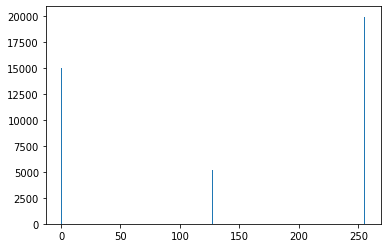

In [33]:
img = np.zeros((200, 200), np.uint8)
cv2.rectangle(img, (0, 100), (200, 200), (255), -1)
cv2.rectangle(img, (0, 50), (100, 100), (127), -1)
cv2.imshow("image", img)
plt.hist(img.ravel(), 256, [0, 256])
plt.show()




cv2.waitKey(0)
cv2.destroyAllWindows()

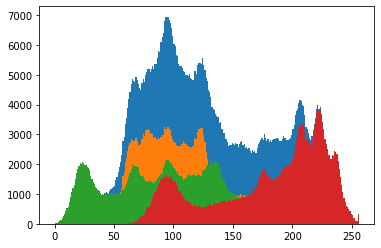

In [42]:
img = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/lena.jpg')

b, g, r = cv2.split(img)

cv2.imshow("Lena", img)
cv2.imshow("b", b)
cv2.imshow("g", g)
cv2.imshow("r", r)

plt.hist(img.ravel(), 256, [0, 256])
plt.hist(b.ravel(), 256, [0, 256])
plt.hist(g.ravel(), 256, [0, 256])
plt.hist(r.ravel(), 256, [0, 256])

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

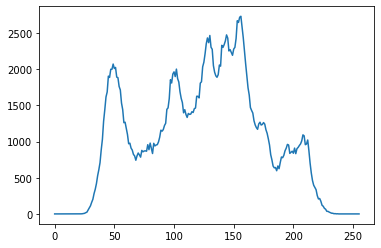

In [47]:
img = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/lena.jpg',0)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
## Template Matching

In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [68]:
img = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/messi5.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img1 = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/mess_face.jpg', 0)

matched = cv2.matchTemplate(imgray, img1, cv2.TM_CCOEFF_NORMED)
print(matched)
thres = 0.51;
loc = np.where(matched>= thres)
print(loc)
w, h = img1.shape[::-1]
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0]+w, pt[1]+h), (0 ,0 ,255), 2)
     
cv2.imshow("messi", img)
cv2.imshow("template", img1)


cv2.waitKey(0)
cv2.destroyAllWindows()

[[ 0.01380845  0.02479484  0.03535112 ... -0.05408011 -0.05574387
  -0.05815575]
 [ 0.02380739  0.0335832   0.04208622 ... -0.05782254 -0.05897278
  -0.06089843]
 [ 0.03375706  0.04220348  0.04891755 ... -0.05762022 -0.05806245
  -0.05928414]
 ...
 [ 0.25707054  0.25673997  0.25674888 ...  0.11351186  0.11057172
   0.10734329]
 [ 0.26150027  0.26109123  0.2609631  ...  0.1075275   0.10573711
   0.10328133]
 [ 0.2668764   0.26670292  0.2664186  ...  0.10178999  0.10122118
   0.09898153]]
(array([47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 49, 49, 49, 49, 50, 50],
      dtype=int64), array([185, 186, 187, 188, 189, 185, 186, 187, 188, 189, 186, 187, 188,
       189, 187, 188], dtype=int64))


In [2]:
## Line detection using Hough line transform

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
img = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/sudoku.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 50, 150, apertureSize = 3 )
cv2.imshow("Canny_image", edges )
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

for line in lines:
    rho, theta = line[0]
    a =np.cos(theta)
    b= np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0+1000*(-b))
    y1 = int(y0+ 1000*(a))
    x2 = int(x0-1000*(-b))
    y2 = int(y0- 1000*(a))
    cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 2)


    
cv2.imshow("Image", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
img = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/sudoku.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 50, 150, apertureSize = 3 )
cv2.imshow("Canny_image", edges )
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap =10)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 2)


    
cv2.imshow("Image", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
img = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/line-markings.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 100, 140, apertureSize = 3 )
cv2.imshow("Canny_image", edges )
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap =10)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 2)


    
cv2.imshow("Image", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(540, 960, 3)


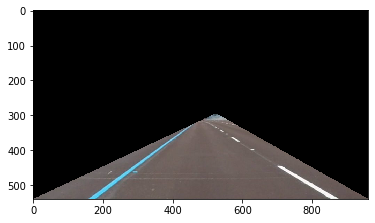

In [47]:
img = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/roads1.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(img.shape)
height = img.shape[0]
width = img.shape[1]
region_of_interes_vertices = [
    (0, height),
    (width/1.83, height/1.83),
    (width, height)
]
def region_of_interest (img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,)*channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

cropped_image = region_of_interest(img, np.array([region_of_interes_vertices], np.int32))

cv2.imshow("Image", img)
plt.imshow(cropped_image)
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

(540, 960, 3)


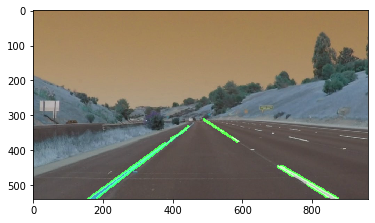

In [67]:

def region_of_interest (img, vertices):
    mask = np.zeros_like(img)
    ##channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_the_line(img, lines):
    copy_image = np.array(img)
    blank_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    
    for line in lines:
        for x1, y1, x2,y2 in line:
            cv2.line(blank_img, (x1, y1), (x2, y2), (0, 255,0), thickness=5)
   
    img = cv2.addWeighted(img, 0.8, blank_img, 1, 0.0)
    return img



image = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/roads1.jpg')
##imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print(image.shape)
height = image.shape[0]
width = image.shape[1]
region_of_interes_vertices = [
    (0, height),
    (width/1.83, height/1.83),
    (width, height)
]


gray_scale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_img = cv2.Canny(gray_scale, 100, 200)
cropped_image = region_of_interest(canny_img, np.array([region_of_interes_vertices], np.int32))
lines = cv2.HoughLinesP(cropped_image, rho=6, theta =np.pi/60, threshold = 160, lines=np.array([]), minLineLength=40, maxLineGap =25)


image_with_lines = draw_the_line(image, lines)
plt.imshow(image_with_lines)


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:

def region_of_interest (img, vertices):
    mask = np.zeros_like(img)
    ##channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_the_line(img, lines):
    copy_image = np.array(img)
    blank_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    
    for line in lines:
        for x1, y1, x2,y2 in line:
            cv2.line(blank_img, (x1, y1), (x2, y2), (0, 255,0), thickness=5)
   
    img = cv2.addWeighted(img, 0.8, blank_img, 1, 0.0)
    return img

def process (image):
    ##image = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/roads1.jpg')
##imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    print(image.shape)
    height = image.shape[0]
    width = image.shape[1]
    region_of_interes_vertices = [
        (0, height),
        (width/1.83, height/1.83),
        (width, height)
    ]


    gray_scale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    canny_img = cv2.Canny(gray_scale, 100, 200)
    cropped_image = region_of_interest(canny_img, np.array([region_of_interes_vertices], np.int32))
    lines = cv2.HoughLinesP(cropped_image, rho=6, theta =np.pi/60, threshold = 160, lines=np.array([]), minLineLength=40, maxLineGap =25)


    image_with_lines = draw_the_line(image, lines)
    return image_with_lines
    
cap = cv2.VideoCapture('F:/Machine leanring/another dataset/opencv-master/samples/data/line_detection.mp4')
while (cap.isOpened()):
        ret, frame = cap.read()
        frame = process(frame)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF ==ord('q'):
            break

cap.release()
cv2.destroyAllWindows



(270, 480, 3)


TypeError: 'NoneType' object is not iterable

In [ ]:
##circle detection

In [ ]:
img = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/smarties.png')
output = img.copy()
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgray = cv2.medianBlur(imgray, 5)
circles = cv2.HoughCircles(imgray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, 
                           param2 =30, minRadius =0, maxRadius=0)
detected_cir = np.uint16(np.around(circles))

for (x,y,r) in detected_cir[0, :]:
    cv2.circle(output, (x,y), r, (0,255,0), 3)
    cv2.circle(output, (x,y), 2, (0,255,255), 3)
cv2.imshow('output', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
img = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/shapes.png')
output = img.copy()
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgray = cv2.medianBlur(imgray, 5)
circles = cv2.HoughCircles(imgray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, 
                           param2 =30, minRadius =0, maxRadius=0)
detected_cir = np.uint16(np.around(circles))

for (x,y,r) in detected_cir[0, :]:
    cv2.circle(output, (x,y), r, (0,255,0), 3)
    cv2.circle(output, (x,y), 2, (0,255,255), 3)
cv2.imshow('output', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
## Face detection

In [2]:
import cv2
import numpy as np

In [21]:
face_cascade = cv2.CascadeClassifier('F:/Machine leanring/another dataset/opencv-master/samples/data/haarcascade_frontalface_default.xml')
img = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/Rakib_Photo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.2, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h),(0, 255, 255), 3)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
face_cascade = cv2.CascadeClassifier('F:/Machine leanring/another dataset/opencv-master/samples/data/haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)
#img = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/Rakib_Photo.jpg')
while cap.isOpened():
    _, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.2, 5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h),(0, 255, 255), 3)
    cv2.imshow('img', img)
    if cv2.waitKey(1) & 0xFF ==ord('p'):
        break

cap.release()


In [ ]:
face_cascade = cv2.CascadeClassifier('F:/Machine leanring/another dataset/opencv-master/samples/data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('F:/Machine leanring/another dataset/opencv-master/samples/data/haarcascade_eye_tree_eyeglasses.xml')
cap = cv2.VideoCapture(0)
#img = cv2.imread('F:/Machine leanring/another dataset/opencv-master/samples/data/Rakib_Photo.jpg')
while cap.isOpened():
    _, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.2, 5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h),(0, 255, 255), 3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color =img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew,eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (255, 255,0), 5)
        
    cv2.imshow('img', img)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break

cap.release()

In [ ]:
## corner detection 

In [4]:
import cv2
import numpy as np

In [14]:
img = cv2.imread('F:/Machine leanring/anther dataset/opencv-master/samples/data/chessboard.png')
#cv2.imshow('Image', img)
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
destination = cv2.cornerHarris(gray, 2,3,0.04)
destination = cv2.dilate(destination, None)
img[destination> 0.01*destination.max()]=[0, 0, 255]
cv2.imshow('destination', img)

if cv2.waitKey(0) & 0xFF ==27:
    cv2.destroyAllWindows()
                               

error: OpenCV(4.2.0) ..\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
